# Bike Sharing Demand - Forecast use of a city bikeshare system
### Public Leaderboard Score: 0.37087 (equivalent to 61st rank out of 3242, Top 98.1%)

[Kaggle Page](https://www.kaggle.com/c/bike-sharing-demand)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Read data

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   casual      10886 non-null  int64  
 10  registered  10886 non-null  int64  
 11  count       10886 non-null  int64  
dtypes: float64(3), int64(8), object(1)
memory usage: 1020.7+ KB


In [6]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6493 entries, 0 to 6492
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    6493 non-null   object 
 1   season      6493 non-null   int64  
 2   holiday     6493 non-null   int64  
 3   workingday  6493 non-null   int64  
 4   weather     6493 non-null   int64  
 5   temp        6493 non-null   float64
 6   atemp       6493 non-null   float64
 7   humidity    6493 non-null   int64  
 8   windspeed   6493 non-null   float64
dtypes: float64(3), int64(5), object(1)
memory usage: 456.7+ KB


In [7]:
train.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
std,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454
min,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000


In [8]:
test.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
count,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000,6493.000000
mean,2.493300,0.029108,0.685815,1.436778,20.620607,24.012865,64.125212,12.631157
std,1.091258,0.168123,0.464226,0.648390,8.059583,8.782741,19.293391,8.250151
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,16.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,49.000000,7.001500
50%,3.000000,0.000000,1.000000,1.000000,21.320000,25.000000,65.000000,11.001400
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,81.000000,16.997900
max,4.000000,1.000000,1.000000,4.000000,40.180000,50.000000,100.000000,55.998600


## Correlation
'holiday' and 'casual': positive correlation  
'workingday' and 'casual' : negative correlation 

'holiday' and 'registered': negative correlation   
'workingday' and 'registered' : positive correlation

'casual': fluctuate much with other variables  
'registered': fluctuate less with other variables

In [9]:
train.corr().loc['casual':'registered', 'season':'windspeed']

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
casual,0.096758,0.043799,-0.319111,-0.135918,0.467097,0.462067,-0.348187,0.092276
registered,0.164011,-0.020956,0.119460,-0.109340,0.318571,0.314635,-0.265458,0.091052


<AxesSubplot:>

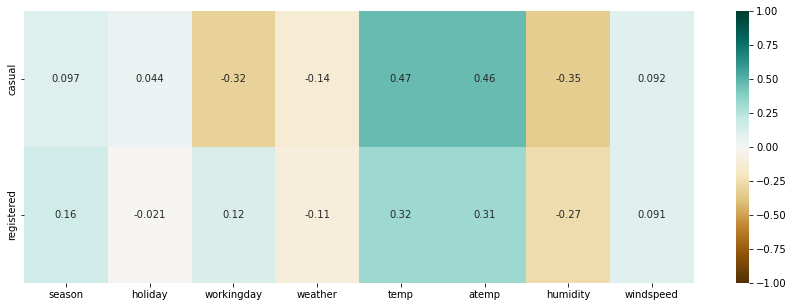

In [10]:
plt.rcParams["figure.figsize"] = (15, 5)
sns.heatmap(train.corr().loc['casual':'registered', 'season':'windspeed'], vmin=-1, vmax=1, annot=True, cmap='BrBG')

## Outliers
There are outliers in humidity in train dataset.  
There are outliers in windspeed in train/test dataset. 

<AxesSubplot:>

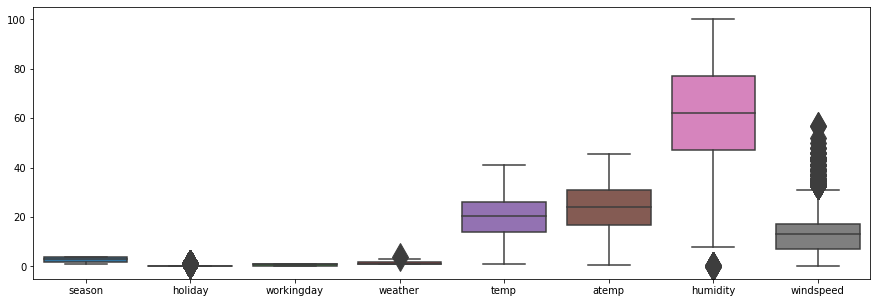

In [11]:
plt.rcParams["figure.figsize"] = (15, 5)
sns.boxplot(data=train[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']], 
            fliersize=20)

<AxesSubplot:>

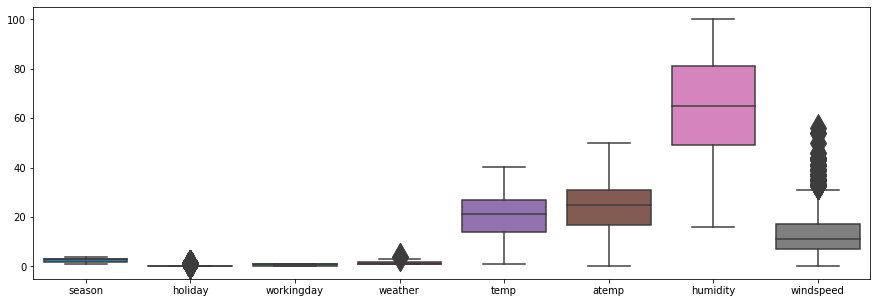

In [12]:
sns.boxplot(data=test[['season', 'holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed']], 
            fliersize=20)

## Skewness
Windspeed is right-skewed, and there are too many zeros.

<AxesSubplot:xlabel='windspeed', ylabel='Count'>

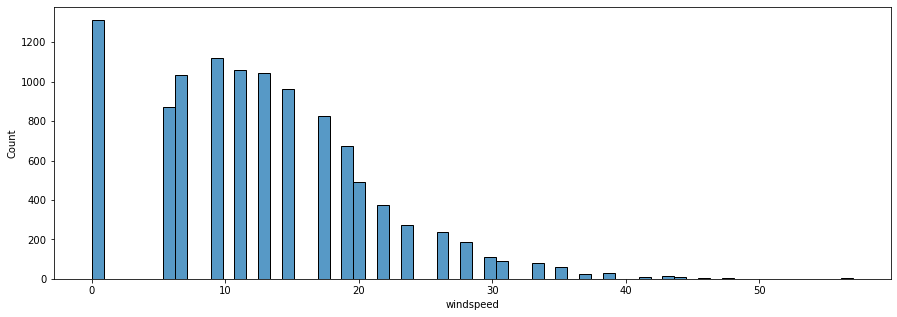

In [13]:
sns.histplot(data=train['windspeed'])

Count before log transformation

<AxesSubplot:xlabel='count', ylabel='Count'>

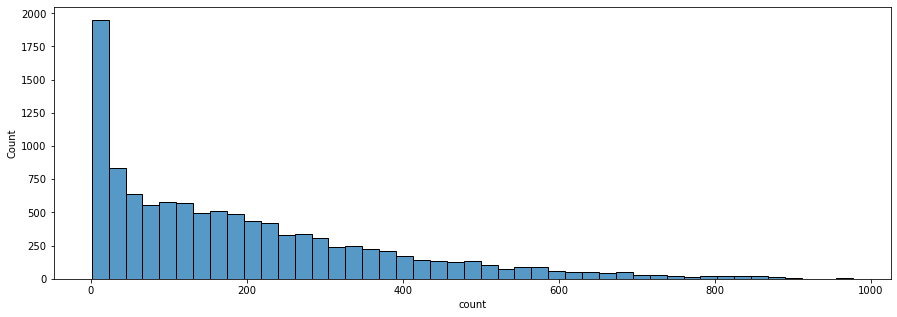

In [14]:
sns.histplot(data = train['count'])

Count after log transformation

<AxesSubplot:xlabel='count', ylabel='Count'>

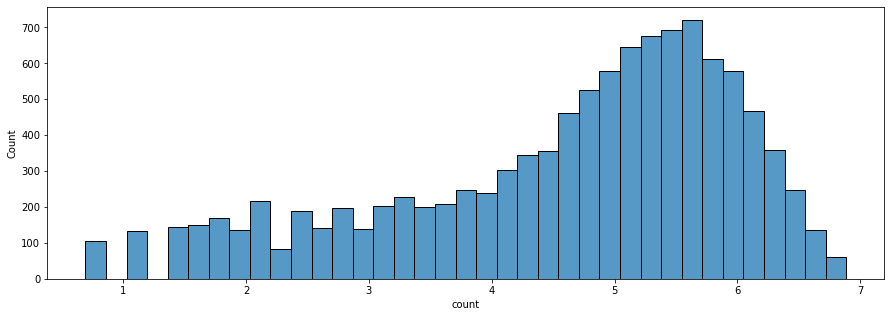

In [15]:
sns.histplot(data = np.log1p(train['count']))

## Preprocessing
Convert 'datetime's dtype from object to datetime64. 

In [16]:
train['datetime'] = train['datetime'].astype('datetime64')
test['datetime'] = test['datetime'].astype('datetime64')

Classify datetime into smaller groups.

In [17]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

Remove outliers in huminty column in training set.

In [18]:
train.describe()['humidity'].iloc[4:7]

25%    47.0
50%    62.0
75%    77.0
Name: humidity, dtype: float64

In [19]:
IQR_humidity = 47-(77-47)*1.5
train.loc[train['humidity'] < IQR_humidity, 'humidity'] = np.NaN
train = train.dropna(how='any')

Replace 0 in windspeed column in training and test set with the average value excluding 0.

In [20]:
train.loc[train['windspeed'] == 0, 'windspeed'] = train.loc[train['windspeed'] > 0, 'windspeed'].mean()
test.loc[test['windspeed'] == 0, 'windspeed'] = test.loc[test['windspeed'] > 0, 'windspeed'].mean()

Replace outliers in windspeed column in training/test dataset with IQR.

In [21]:
train.describe()['windspeed'].iloc[4:7]

25%     8.998100
50%    14.548028
75%    16.997900
Name: windspeed, dtype: float64

In [22]:
IQR_windspeed = 16.9979 + (16.9979 - 8.89981)*1.5
train.loc[train['windspeed'] > IQR_windspeed, 'windspeed'] = IQR_windspeed
test.loc[test['windspeed'] > IQR_windspeed, 'windspeed'] = IQR_windspeed

## Features & label

In [23]:
train.columns

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count',
       'year', 'month', 'day', 'hour', 'minute', 'second', 'dayofweek'],
      dtype='object')

Features

In [24]:
features = [
#     'datetime', 
    'season', 
    'holiday', 
    'workingday', 
    'weather', 
    'temp', 
#     'atemp', 
    'humidity', 
    'windspeed',
    'year', 
#     'month', 
#     'day', 
    'hour', 
#     'minute', 
#     'second', 
    'dayofweek',
]

features

['season',
 'holiday',
 'workingday',
 'weather',
 'temp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek']

We will make two separate predictions (casual, registered), so there are two labels. And we will log-transform labels.

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline

# Define metrics
from sklearn.metrics import mean_squared_log_error
RMSLE = lambda y_true, y_pred: np.sqrt(mean_squared_log_error(y_true, y_pred))

# Define SEED
SEED = 123

In [26]:
label1 = 'casual'
x_train1, x_test1, y_train1, y_test1 = train_test_split(train[features],
                                                        np.log1p(train[label1]), # Log-transformation
                                                        random_state=SEED)

label2 = 'registered'
x_train2, x_test2, y_train2, y_test2 = train_test_split(train[features],
                                                        np.log1p(train[label2]), # Log-transformation
                                                        random_state=SEED)

## Modeling & Prediction
Pipeline = PolynomialFeatures + XGBRegressor

In [27]:
from sklearn.preprocessing import PolynomialFeatures
from xgboost import XGBRegressor

In [28]:
model1 = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    XGBRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1250, subsample=0.8, n_jobs=1)
)

model1.fit(x_train1, y_train1)
pred1 = model1.predict(x_test1)
pred1[:5]

array([5.531183  , 3.359123  , 3.4387918 , 0.53110456, 0.9550309 ],
      dtype=float32)

In [29]:
model2 = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    XGBRegressor(random_state=SEED, learning_rate=0.01, n_estimators=1250, subsample=0.8, n_jobs=1)
)

model2.fit(x_train2, y_train2)
pred2 = model2.predict(x_test2)
pred2[:5]

array([5.894285 , 4.8414965, 4.790234 , 1.3746439, 4.669946 ],
      dtype=float32)

Exponential-transformation (invert of log-transformation)

In [30]:
RMSLE((np.expm1(y_test1) + np.expm1(y_test2)), (np.expm1(pred1) + np.expm1(pred2)))

0.2880957103161576

Final prediction

In [31]:
final_pred1 = model1.predict(test[features])
final_pred2 = model2.predict(test[features])

final_pred = np.expm1(final_pred1) + np.expm1(final_pred2)
final_pred[:5]

array([11.111675 ,  5.049467 ,  2.4602816,  2.0225062,  1.6976143],
      dtype=float32)

Create submission.csv

In [32]:
submission = pd.read_csv('sampleSubmission.csv')
submission['count'] = final_pred
display(submission)
submission.to_csv('submission.csv', index=False)

,datetime,count
0,2011-01-20 00:00:00,11.111675
1,2011-01-20 01:00:00,5.049467
2,2011-01-20 02:00:00,2.460282
3,2011-01-20 03:00:00,2.022506
4,2011-01-20 04:00:00,1.697614
...,...,...
6488,2012-12-31 19:00:00,215.614853
6489,2012-12-31 20:00:00,150.759583
6490,2012-12-31 21:00:00,125.936752
6491,2012-12-31 22:00:00,83.855057
